# Data analysis for Stack Overflow 2019 Survey results
This is the project 1 code for DSND term 2.

The database I pick is the Stack Overflow 2019 survey data. With this data, we can better understand how different factors impact programmer's annual income, also further help young programmer develope. 

## 1. Data Understanding
The whole data set is available at following site: https://insights.stackoverflow.com/survey

The survey results contains 5 files:
- README_2019.txt: a brief introduction to the survey files.
- so_surver_2019.pdf: the survey.
- survey_results_public.csv: survey results.
- survey_results_schema.csv: servey column interpretation
- survey_results_schema.xsl: servey column interpretation

Let's look at the data. There are total 85 questions asked in the survey, and answered by 88883 respondents. Not all survey questions are answered, thus missing values exist in the data. 

In [81]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.decomposition import PCA
import sklearn.preprocessing as sp
import matplotlib.pyplot as plt
import operator
from sklearn.cluster import KMeans
%matplotlib inline

# the pandas setting for display the data set.
# show all columns selected
# show all rows
# show all contents for a column
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', -1)

# load data files
surveyfile = "./developer_survey_2019/survey_results_public.csv"
schemafile = "./developer_survey_2019/survey_results_schema.csv"
surveydf = pd.read_csv(surveyfile)
schemadf = pd.read_csv(schemafile)

In [82]:
surveydf.head(5)

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,OrgSize,DevType,YearsCode,Age1stCode,YearsCodePro,CareerSat,JobSat,MgrIdiot,MgrMoney,MgrWant,JobSeek,LastHireDate,LastInt,FizzBuzz,JobFactors,ResumeUpdate,CurrencySymbol,CurrencyDesc,CompTotal,CompFreq,ConvertedComp,WorkWeekHrs,WorkPlan,WorkChallenge,WorkRemote,WorkLoc,ImpSyn,CodeRev,CodeRevHrs,UnitTests,PurchaseHow,PurchaseWhat,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,MiscTechWorkedWith,MiscTechDesireNextYear,DevEnviron,OpSys,Containers,BlockchainOrg,BlockchainIs,BetterLife,ITperson,OffOn,SocialMedia,Extraversion,ScreenName,SOVisit1st,SOVisitFreq,SOVisitTo,SOFindAnswer,SOTimeSaved,SOHowMuchTime,SOAccount,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software is about the same,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,"Taught yourself a new language, framework, or tool without taking a formal course",NaN,NaN,4,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HTML/CSS;Java;JavaScript;Python,C;C++;C#;Go;HTML/CSS;Java;JavaScript;Python;SQL,SQLite,MySQL,MacOS;Windows,Android;Arduino;Windows,Django;Flask,Flask;jQuery,Node.js,Node.js,IntelliJ;Notepad++;PyCharm,Windows,I do not use containers,NaN,NaN,Yes,"Fortunately, someone else has that title",Yes,Twitter,Online,Username,2017,A few times per month or weekly,Find answers to specific questions;Learn how to do things I didn’t necessarily look for,3-5 times per week,Stack Overflow was much faster,31-60 minutes,No,NaN,"No, I didn't know that Stack Overflow had a job board","No, and I don't know what those are",Neutral,Just as welcome now as I felt last year,Tech articles written by other developers;Industry news about technologies you're interested in;Courses on technologies you're interested in,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software is about the same,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)",NaN,Taken an online course in programming or software development (e.g. a MOOC),NaN,"Developer, desktop or enterprise applications;Developer, front-end",NaN,17,NaN,NaN,NaN,NaN,NaN,NaN,I am actively looking for a job,I've never had a job,NaN,NaN,"Financial performance or funding status of the company or organization;Specific department or team I'd be working on;Languages, frameworks, and other technologies I'd be working with","Something else changed (education, award, media, etc.)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C++;HTML/CSS;Python,C++;HTML/CSS;JavaScript;SQL,NaN,MySQL,Windows,Windows,Django,Django,NaN,NaN,Atom;PyCharm,Windows,I do not use containers,NaN,Useful across many domains and could change many aspects of our lives,Yes,Yes,Yes,Instagram,Online,Username,2017,Daily or almost daily,Find answers to specific questions;Learn how to do things I didn’t necessarily look for,3-5 times per week,Stack Overflow was much faster,11-30 minutes,Yes,A few times per month or weekly,"No, I knew that Stack Overflow had a job board but have never used or visited it","No, and I don't know what those are","Yes, somewhat",Just as welcome now as I felt last year,Tech articles written by other developers;Industry news about technologies you're interested in;Tech meetups or events in your area;Courses on technologies you're interested in,19.0,Man,No,Straight / Heterosexual,NaN,No,

### 1.1 Numeracial data stats

In [204]:
surveydf. describe()

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
count,88883.000000,5.594500e+04,5.582300e+04,64503.000000,49790.000000,79210.000000
mean,44442.000000,5.519014e+11,1.271107e+05,42.127197,5.084308,30.336699
std,25658.456325,7.331926e+13,2.841523e+05,37.287610,5.513931,9.178390
min,1.000000,0.000000e+00,0.000000e+00,1.000000,0.000000,1.000000
25%,22221.500000,2.000000e+04,2.577750e+04,40.000000,2.000000,24.000000
50%,44442.000000,6.200000e+04,5.728700e+04,40.000000,4.000000,29.000000
75%,66662.500000,1.200000e+05,1.000000e+05,44.750000,6.000000,35.000000
max,88883.000000,1.000000e+16,2.000000e+06,4850.000000,99.000000,99.000000


In [83]:
surveydf.shape

(88883, 85)

In [84]:
surveydf.dtypes.value_counts() 

object     79
float64    5 
int64      1 
dtype: int64

In [85]:
surveydf.select_dtypes(include=['float64'])[0:5]

,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
0,NaN,NaN,NaN,NaN,14.0
1,NaN,NaN,NaN,NaN,19.0
2,23000.0,8820.0,40.0,NaN,28.0
3,61000.0,61000.0,80.0,NaN,22.0
4,NaN,NaN,55.0,NaN,30.0


In [86]:
schemadf.head(5)

,Column,QuestionText
0,Respondent,Randomized respondent ID number (not in order of survey response time)
1,MainBranch,"Which of the following options best describes you today? Here, by ""developer"" we mean ""someone who writes code."""
2,Hobbyist,Do you code as a hobby?
3,OpenSourcer,How often do you contribute to open source?
4,OpenSource,How do you feel about the quality of open source software (OSS)?


In [203]:
schemadf.shape

(85, 2)

Using info above, we get that there are total 85 survey questions with 88883 responds. The data set containing 79 catagorical variables, 5 float number variables and 1 int variable (which is actually the response ID). I am more interested in how does education play a role in their career, thus picking 21 questions for further understanding. 

In [88]:
subset = [
    'Hobbyist', 'OpenSourcer', 'Employment', 'Country',
    'Student', 'EdLevel', 'UndergradMajor', 'YearsCode',
    'YearsCodePro', 'ConvertedComp', 'WorkWeekHrs', 'WorkPlan',
    'CodeRev', 'CodeRevHrs', 'SocialMedia', 'Age', 'Gender'
]
select_dataset = surveydf[subset]
select_dataset.head(10)

,Hobbyist,OpenSourcer,Employment,Country,Student,EdLevel,UndergradMajor,YearsCode,YearsCodePro,ConvertedComp,WorkWeekHrs,WorkPlan,CodeRev,CodeRevHrs,SocialMedia,Age,Gender
0,Yes,Never,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,Twitter,14.0,Man
1,No,Less than once per year,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Instagram,19.0,Man
2,Yes,Never,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,3,1,8820.0,40.0,There's no schedule or spec; I work on what seems most important or urgent,No,NaN,Reddit,28.0,Man
3,No,Never,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or software engineering",3,Less than 1 year,61000.0,80.0,There's no schedule or spec; I work on what seems most important or urgent,No,NaN,Reddit,22.0,Man
4,Yes,Once a month or more often,Employed full-time,Ukraine,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or software engineering",16,9,NaN,55.0,"There is a schedule and/or spec (made by me or by a colleague), and I follow it very closely","Yes, because I see value in code review",NaN,Facebook,30.0,Man
5,Yes,Never,Employed full-time,Canada,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,13,3,366420.0,15.0,There's no schedule or spec; I work on what seems most important or urgent,No,NaN,YouTube,28.0,Man
6,No,Never,"Independent contractor, freelancer, or self-employed",Ukraine,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Another engineering discipline (ex. civil, electrical, mechanical)",6,4,NaN,32.0,"There is a schedule and/or spec (made by me or by a colleague), and I follow it very closely","Yes, because I see value in code review",6.0,YouTube,42.0,Man
7,Yes,Less than once per year,"Not employed, but looking for work",India,NaN,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or software engineering",8,NaN,NaN,NaN,NaN,NaN,NaN,YouTube,24.0,Man
8,Yes,Once a month or more often,Employed full-time,New Zealand,No,Some college/university study without earning a degree,"Computer science, computer engineering, or software engineering",12,4,95179.0,32.0,"There is a schedule and/or spec (made by me or by a colleague), and my work somewhat aligns","Yes, because I see value in code review",12.0,Twitter,23.0,Man
9,Yes,Once a month or more often,Employed full-time,India,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",NaN,12,10,13293.0,70.0,There's no schedule or spec; I work on what seems most important or urgent,"Yes, because I see value in code review",4.0,YouTube,NaN,NaN


In [89]:
questions = schemadf[schemadf["Column"].isin(subset)]
questions

,Column,QuestionText
2,Hobbyist,Do you code as a hobby?
3,OpenSourcer,How often do you contribute to open source?
5,Employment,Which of the following best describes your current employment status?
6,Country,In which country do you currently reside?
7,Student,"Are you currently enrolled in a formal, degree-granting college or university program?"
8,EdLevel,Which of the following best describes the highest level of formal education that you’ve completed?
9,UndergradMajor,What was your main or most important field of study?
13,YearsCode,"Including any education, how many years have you been coding?"
15,YearsCodePro,How many years have you coded professionally (as a part of your work)?
31,ConvertedComp,"Salary converted to annual USD salaries using the exchange rate on 2019-02-01, assuming 12 working months and 50 working weeks."


In [90]:
select_dataset.dtypes.value_counts() 

object     13
float64    4 
dtype: int64

In [91]:
select_dataset.dtypes

Hobbyist          object 
OpenSourcer       object 
Employment        object 
Country           object 
Student           object 
EdLevel           object 
UndergradMajor    object 
YearsCode         object 
YearsCodePro      object 
ConvertedComp     float64
WorkWeekHrs       float64
WorkPlan          object 
CodeRev           object 
CodeRevHrs        float64
SocialMedia       object 
Age               float64
Gender            object 
dtype: object

## 2. Questions
The main goal is to look at the # 31 ConvertedComp - the salary. This is annual USD salaries using the exchange rate on 2019-02-01, assuming 12 working months and 50 working weeks. 

I am interested in how other 16 factors are contributing to the salaries. In 16 factors, there are 3 numeric data columns, (WorkWeekHrs, CodeRevHrs, Age), and all other 13 are catagorical data. But after a close look at the dataframe, we find that the (YearsCode and YearsCodePro) are also numberic values. 

My questions are listed as following:
- Question 1: Does High Salary Meaning Lots of Working Hours?
- Question 2: What Are Factors That Contribution to High Salary?
- Question 3: Does People with High Salaries Are Using Different Social Media Comparing to People with Moderate Salaries?

## 3. Data Preparation

### 3.1 Remove missing data for *ConvertedComp* column
Since our goal is to understand the converted salary, we could remove all records that have missing value for this column. In this step, we reduce the record number form 88883 to 55823. 

In [92]:
all_row_data = select_dataset.dropna(axis=0, how='all') # Drop only rows with all missing values 
all_col_data = all_row_data.dropna(axis=1, how='all') # Drop only columns with all missing values
all_col_data.shape

(88883, 17)

In [93]:
# remove records with missing value for salary. 
mis_salary_data = all_col_data.dropna(subset=["ConvertedComp"], axis=0, how='any')
mis_salary_data.shape

(55823, 17)

In [94]:
# remove columns with lots of missing values.
mis_salary_data.isna().mean(axis=0)

Hobbyist          0.000000
OpenSourcer       0.000000
Employment        0.002472
Country           0.000000
Student           0.006252
EdLevel           0.014886
UndergradMajor    0.081669
YearsCode         0.001541
YearsCodePro      0.002974
ConvertedComp     0.000000
WorkWeekHrs       0.009064
WorkPlan          0.019329
CodeRev           0.002114
CodeRevHrs        0.261451
SocialMedia       0.038980
Age               0.041381
Gender            0.016660
dtype: float64

Here we see that there is no column that has lots of missing values, thus we don't have to remove any column from the dataframe. 

In [95]:
# remove rows with lots of missing values.
mis_salary_data.isna().mean(axis=1).describe()

count    55823.000000
mean     0.029340    
std      0.041784    
min      0.000000    
25%      0.000000    
50%      0.000000    
75%      0.058824    
max      0.529412    
dtype: float64

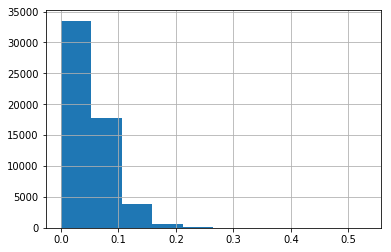

In [96]:
# ploting histogram for missing values in a row. 
mis_salary_data.isna().mean(axis=1).hist()

A convenient definition of an outlier is a point which falls more than 1.5 times the interquartile range above the third quartile or below the first quartile.

In [97]:
sub_stats=mis_salary_data.isna().mean(axis=1).describe()
sub_iqr = sub_stats["75%"] - sub_stats["25%"]
sub_barrier = sub_iqr * 1.5 + sub_stats["75%"]
sub_barrier

0.14705882352941174

### 3.2 Filtering Out Records with More Missing Values
For filtering out records with more missing values, we reduce the record number from 55823 to 55806.

In [98]:
# drop records that have missing values that are more than barrier calculated
mis_row_data = mis_salary_data[mis_salary_data.isna().mean(axis=1)<sub_barrier]
mis_row_data.shape

(55086, 17)

### 3.3 Convert YearsCode & YearsCodePro Columns into Numeric datasets

In [99]:
mis_row_data.dtypes

Hobbyist          object 
OpenSourcer       object 
Employment        object 
Country           object 
Student           object 
EdLevel           object 
UndergradMajor    object 
YearsCode         object 
YearsCodePro      object 
ConvertedComp     float64
WorkWeekHrs       float64
WorkPlan          object 
CodeRev           object 
CodeRevHrs        float64
SocialMedia       object 
Age               float64
Gender            object 
dtype: object

In [100]:
# replace the Less than 1 year with 0, and more than 50 years with 51
mis_row_data.loc[:,"YearsCode"].replace({"Less than 1 year": "0", "More than 50 years": "51"}, inplace = True)
mis_row_data.loc[:,"YearsCodePro"].replace({"Less than 1 year": "0", "More than 50 years": "51"}, inplace = True)
mis_row_data.loc[:,"YearsCode"] = pd.to_numeric(mis_row_data.loc[:,"YearsCode"], errors='ignore')
mis_row_data.loc[:,"YearsCodePro"] = pd.to_numeric(mis_row_data.loc[:,"YearsCodePro"], errors='ignore')

E:\Anaconda3\lib\site-packages\pandas\core\generic.py:5890: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
E:\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


Then let's look at the column data again.

In [101]:
mis_row_data.dtypes

Hobbyist          object 
OpenSourcer       object 
Employment        object 
Country           object 
Student           object 
EdLevel           object 
UndergradMajor    object 
YearsCode         float64
YearsCodePro      float64
ConvertedComp     float64
WorkWeekHrs       float64
WorkPlan          object 
CodeRev           object 
CodeRevHrs        float64
SocialMedia       object 
Age               float64
Gender            object 
dtype: object

After value replacement, we see the datatype of the these two columns automatically changed to float64. 

In [102]:
# obtain columns for catagorical data
cat_cols =  mis_row_data.columns[mis_row_data.dtypes=="object"]
cat_cols

Index(['Hobbyist', 'OpenSourcer', 'Employment', 'Country', 'Student',
       'EdLevel', 'UndergradMajor', 'WorkPlan', 'CodeRev', 'SocialMedia',
       'Gender'],
      dtype='object')

In [103]:
# create dummy variables for catagorical data columns 
dummy_data = pd.get_dummies(mis_row_data, columns = list(cat_cols))    # the step that converting the series to list is necessary for the function to work correctly
dummy_data.head()

,YearsCode,YearsCodePro,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age,Hobbyist_No,Hobbyist_Yes,OpenSourcer_Less than once a month but more than once per year,OpenSourcer_Less than once per year,OpenSourcer_Never,OpenSourcer_Once a month or more often,Employment_Employed full-time,Employment_Employed part-time,"Employment_Independent contractor, freelancer, or self-employed",Country_Afghanistan,Country_Albania,Country_Algeria,Country_Andorra,Country_Angola,Country_Argentina,Country_Armenia,Country_Australia,Country_Austria,Country_Azerbaijan,Country_Bahrain,Country_Bangladesh,Country_Barbados,Country_Belarus,Country_Belgium,Country_Bolivia,Country_Bosnia and Herzegovina,Country_Botswana,Country_Brazil,Country_Brunei Darussalam,Country_Bulgaria,Country_Burkina Faso,Country_Burundi,Country_Cambodia,Country_Cameroon,Country_Canada,Country_Chad,Country_Chile,Country_China,Country_Colombia,"Country_Congo, Republic of the...",Country_Costa Rica,Country_Croatia,Country_Cuba,Country_Cyprus,Country_Czech Republic,Country_Côte d'Ivoire,Country_Democratic People's Republic of Korea,Country_Democratic Republic of the Congo,Country_Denmark,Country_Djibouti,Country_Dominican Republic,Country_Ecuador,Country_Egypt,Country_El Salvador,Country_Estonia,Country_Ethiopia,Country_Fiji,Country_Finland,Country_France,Country_Gabon,Country_Georgia,Country_Germany,Country_Ghana,Country_Greece,Country_Guatemala,Country_Guinea,Country_Haiti,Country_Honduras,Country_Hong Kong (S.A.R.),Country_Hungary,Country_Iceland,Country_India,Country_Indonesia,Country_Iran,Country_Iraq,Country_Ireland,Country_Israel,Country_Italy,Country_Jamaica,Country_Japan,Country_Jordan,Country_Kazakhstan,Country_Kenya,Country_Kuwait,Country_Kyrgyzstan,Country_Lao People's Democratic Republic,Country_Latvia,Country_Lebanon,Country_Lesotho,Country_Libyan Arab Jamahiriya,Country_Liechtenstein,Country_Lithuania,Country_Luxembourg,Country_Madagascar,Country_Malawi,Country_Malaysia,Country_Maldives,Country_Mali,Country_Malta,Country_Mauritius,Country_Mexico,Country_Monaco,Country_Mongolia,Country_Montenegro,Country_Morocco,Country_Mozambique,Country_Myanmar,Country_Nepal,Country_Netherlands,Country_New Zealand,Country_Nicaragua,Country_Nigeria,Country_Norway,Country_Oman,Country_Other Country (Not Listed Above),Country_Pakistan,Country_Panama,Country_Paraguay,Country_Peru,Country_Philippines,Country_Poland,Country_Portugal,Country_Qatar,Country_Republic of Korea,Country_Republic of Moldova,Country_Romania,Country_Russian Federation,Country_Rwanda,Country_Saint Vincent and the Grenadines,Country_San Marino,Country_Saudi Arabia,Country_Senegal,Country_Serbia,Country_Seychelles,Country_Singapore,Country_Slovakia,Country_Slovenia,Country_Somalia,Country_South Africa,Country_South Korea,Country_Spain,Country_Sri Lanka,Country_Sudan,Country_Swaziland,Country_Sweden,Country_Switzerland,Country_Syrian Arab Republic,Country_Taiwan,Country_Tajikistan,Country_Thailand,Country_The former Yugoslav Republic of Macedonia,Country_Timor-Leste,Country_Togo,Country_Trinidad and Tobago,Country_Tunisia,Country_Turkey,Country_Turkmenistan,Country_Uganda,Country_Ukraine,Country_United Arab Emirates,Country_United Kingdom,Country_United Republic of Tanzania,Country_United States,Country_Uruguay,Country_Uzbekistan,"Country_Venezuela, Bolivarian Republic of...",Country_Viet Nam,Country_Yemen,Country_Zambia,Country_Zimbabwe,Student_No,"Student_Yes, full-time","Student_Yes, part-time",EdLevel_Associate degree,"EdLevel_Bachelor’s degree (BA, BS, B.Eng., etc.)",EdLevel_I never completed any formal education,"EdLevel_Master’s degree (MA, MS, M.Eng., MBA, etc.)","EdLevel_Other doctoral degree (Ph.D, Ed.D., etc.)",EdLevel_Primary/elementary school,"EdLevel_Professional degree (JD, MD, etc.)","EdLevel_Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)",EdLevel_Some college/university study without earning a degree,"UndergradMajor_A business discipline (ex. accounting, finance, marketing)","Un

In [104]:
dummy_data.shape

(55086, 227)

### 3.4 Fill the missing value with mean

In [105]:
# Mean function
fill_mean = lambda col: col.fillna(col.mean())
# Fill the mean
fill_data = dummy_data.apply(fill_mean, axis=0)
fill_data.head(5)

,YearsCode,YearsCodePro,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age,Hobbyist_No,Hobbyist_Yes,OpenSourcer_Less than once a month but more than once per year,OpenSourcer_Less than once per year,OpenSourcer_Never,OpenSourcer_Once a month or more often,Employment_Employed full-time,Employment_Employed part-time,"Employment_Independent contractor, freelancer, or self-employed",Country_Afghanistan,Country_Albania,Country_Algeria,Country_Andorra,Country_Angola,Country_Argentina,Country_Armenia,Country_Australia,Country_Austria,Country_Azerbaijan,Country_Bahrain,Country_Bangladesh,Country_Barbados,Country_Belarus,Country_Belgium,Country_Bolivia,Country_Bosnia and Herzegovina,Country_Botswana,Country_Brazil,Country_Brunei Darussalam,Country_Bulgaria,Country_Burkina Faso,Country_Burundi,Country_Cambodia,Country_Cameroon,Country_Canada,Country_Chad,Country_Chile,Country_China,Country_Colombia,"Country_Congo, Republic of the...",Country_Costa Rica,Country_Croatia,Country_Cuba,Country_Cyprus,Country_Czech Republic,Country_Côte d'Ivoire,Country_Democratic People's Republic of Korea,Country_Democratic Republic of the Congo,Country_Denmark,Country_Djibouti,Country_Dominican Republic,Country_Ecuador,Country_Egypt,Country_El Salvador,Country_Estonia,Country_Ethiopia,Country_Fiji,Country_Finland,Country_France,Country_Gabon,Country_Georgia,Country_Germany,Country_Ghana,Country_Greece,Country_Guatemala,Country_Guinea,Country_Haiti,Country_Honduras,Country_Hong Kong (S.A.R.),Country_Hungary,Country_Iceland,Country_India,Country_Indonesia,Country_Iran,Country_Iraq,Country_Ireland,Country_Israel,Country_Italy,Country_Jamaica,Country_Japan,Country_Jordan,Country_Kazakhstan,Country_Kenya,Country_Kuwait,Country_Kyrgyzstan,Country_Lao People's Democratic Republic,Country_Latvia,Country_Lebanon,Country_Lesotho,Country_Libyan Arab Jamahiriya,Country_Liechtenstein,Country_Lithuania,Country_Luxembourg,Country_Madagascar,Country_Malawi,Country_Malaysia,Country_Maldives,Country_Mali,Country_Malta,Country_Mauritius,Country_Mexico,Country_Monaco,Country_Mongolia,Country_Montenegro,Country_Morocco,Country_Mozambique,Country_Myanmar,Country_Nepal,Country_Netherlands,Country_New Zealand,Country_Nicaragua,Country_Nigeria,Country_Norway,Country_Oman,Country_Other Country (Not Listed Above),Country_Pakistan,Country_Panama,Country_Paraguay,Country_Peru,Country_Philippines,Country_Poland,Country_Portugal,Country_Qatar,Country_Republic of Korea,Country_Republic of Moldova,Country_Romania,Country_Russian Federation,Country_Rwanda,Country_Saint Vincent and the Grenadines,Country_San Marino,Country_Saudi Arabia,Country_Senegal,Country_Serbia,Country_Seychelles,Country_Singapore,Country_Slovakia,Country_Slovenia,Country_Somalia,Country_South Africa,Country_South Korea,Country_Spain,Country_Sri Lanka,Country_Sudan,Country_Swaziland,Country_Sweden,Country_Switzerland,Country_Syrian Arab Republic,Country_Taiwan,Country_Tajikistan,Country_Thailand,Country_The former Yugoslav Republic of Macedonia,Country_Timor-Leste,Country_Togo,Country_Trinidad and Tobago,Country_Tunisia,Country_Turkey,Country_Turkmenistan,Country_Uganda,Country_Ukraine,Country_United Arab Emirates,Country_United Kingdom,Country_United Republic of Tanzania,Country_United States,Country_Uruguay,Country_Uzbekistan,"Country_Venezuela, Bolivarian Republic of...",Country_Viet Nam,Country_Yemen,Country_Zambia,Country_Zimbabwe,Student_No,"Student_Yes, full-time","Student_Yes, part-time",EdLevel_Associate degree,"EdLevel_Bachelor’s degree (BA, BS, B.Eng., etc.)",EdLevel_I never completed any formal education,"EdLevel_Master’s degree (MA, MS, M.Eng., MBA, etc.)","EdLevel_Other doctoral degree (Ph.D, Ed.D., etc.)",EdLevel_Primary/elementary school,"EdLevel_Professional degree (JD, MD, etc.)","EdLevel_Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)",EdLevel_Some college/university study without earning a degree,"UndergradMajor_A business discipline (ex. accounting, finance, marketing)","Un

### 3.5 Scale data with robust scaler

In [106]:
# Apply feature scaling to the general population demographics data.
scaler = sp.RobustScaler()
scaler.fit(fill_data)
scaled_data = pd.DataFrame(scaler.transform(fill_data))
scaled_data.columns = fill_data.columns
scaled_data.index = fill_data.index
scaled_data.head(5)

,YearsCode,YearsCodePro,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age,Hobbyist_No,Hobbyist_Yes,OpenSourcer_Less than once a month but more than once per year,OpenSourcer_Less than once per year,OpenSourcer_Never,OpenSourcer_Once a month or more often,Employment_Employed full-time,Employment_Employed part-time,"Employment_Independent contractor, freelancer, or self-employed",Country_Afghanistan,Country_Albania,Country_Algeria,Country_Andorra,Country_Angola,Country_Argentina,Country_Armenia,Country_Australia,Country_Austria,Country_Azerbaijan,Country_Bahrain,Country_Bangladesh,Country_Barbados,Country_Belarus,Country_Belgium,Country_Bolivia,Country_Bosnia and Herzegovina,Country_Botswana,Country_Brazil,Country_Brunei Darussalam,Country_Bulgaria,Country_Burkina Faso,Country_Burundi,Country_Cambodia,Country_Cameroon,Country_Canada,Country_Chad,Country_Chile,Country_China,Country_Colombia,"Country_Congo, Republic of the...",Country_Costa Rica,Country_Croatia,Country_Cuba,Country_Cyprus,Country_Czech Republic,Country_Côte d'Ivoire,Country_Democratic People's Republic of Korea,Country_Democratic Republic of the Congo,Country_Denmark,Country_Djibouti,Country_Dominican Republic,Country_Ecuador,Country_Egypt,Country_El Salvador,Country_Estonia,Country_Ethiopia,Country_Fiji,Country_Finland,Country_France,Country_Gabon,Country_Georgia,Country_Germany,Country_Ghana,Country_Greece,Country_Guatemala,Country_Guinea,Country_Haiti,Country_Honduras,Country_Hong Kong (S.A.R.),Country_Hungary,Country_Iceland,Country_India,Country_Indonesia,Country_Iran,Country_Iraq,Country_Ireland,Country_Israel,Country_Italy,Country_Jamaica,Country_Japan,Country_Jordan,Country_Kazakhstan,Country_Kenya,Country_Kuwait,Country_Kyrgyzstan,Country_Lao People's Democratic Republic,Country_Latvia,Country_Lebanon,Country_Lesotho,Country_Libyan Arab Jamahiriya,Country_Liechtenstein,Country_Lithuania,Country_Luxembourg,Country_Madagascar,Country_Malawi,Country_Malaysia,Country_Maldives,Country_Mali,Country_Malta,Country_Mauritius,Country_Mexico,Country_Monaco,Country_Mongolia,Country_Montenegro,Country_Morocco,Country_Mozambique,Country_Myanmar,Country_Nepal,Country_Netherlands,Country_New Zealand,Country_Nicaragua,Country_Nigeria,Country_Norway,Country_Oman,Country_Other Country (Not Listed Above),Country_Pakistan,Country_Panama,Country_Paraguay,Country_Peru,Country_Philippines,Country_Poland,Country_Portugal,Country_Qatar,Country_Republic of Korea,Country_Republic of Moldova,Country_Romania,Country_Russian Federation,Country_Rwanda,Country_Saint Vincent and the Grenadines,Country_San Marino,Country_Saudi Arabia,Country_Senegal,Country_Serbia,Country_Seychelles,Country_Singapore,Country_Slovakia,Country_Slovenia,Country_Somalia,Country_South Africa,Country_South Korea,Country_Spain,Country_Sri Lanka,Country_Sudan,Country_Swaziland,Country_Sweden,Country_Switzerland,Country_Syrian Arab Republic,Country_Taiwan,Country_Tajikistan,Country_Thailand,Country_The former Yugoslav Republic of Macedonia,Country_Timor-Leste,Country_Togo,Country_Trinidad and Tobago,Country_Tunisia,Country_Turkey,Country_Turkmenistan,Country_Uganda,Country_Ukraine,Country_United Arab Emirates,Country_United Kingdom,Country_United Republic of Tanzania,Country_United States,Country_Uruguay,Country_Uzbekistan,"Country_Venezuela, Bolivarian Republic of...",Country_Viet Nam,Country_Yemen,Country_Zambia,Country_Zimbabwe,Student_No,"Student_Yes, full-time","Student_Yes, part-time",EdLevel_Associate degree,"EdLevel_Bachelor’s degree (BA, BS, B.Eng., etc.)",EdLevel_I never completed any formal education,"EdLevel_Master’s degree (MA, MS, M.Eng., MBA, etc.)","EdLevel_Other doctoral degree (Ph.D, Ed.D., etc.)",EdLevel_Primary/elementary school,"EdLevel_Professional degree (JD, MD, etc.)","EdLevel_Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)",EdLevel_Some college/university study without earning a degree,"UndergradMajor_A business discipline (ex. accounting, finance, marketing)","Un

## 4. PCA Analysis
 
PCA analysis is looking at the data as a whole, and tell which are the factors that account most for the differences between data. As in our case, the transfered axis (components) does not mean a novo/meaningful classification, we would not consider it. Still, it would be interesting to see which are the factors that separate the survey takers. 

### 4.1 Deciding number of components for PCA analysis.

In [107]:
# Apply PCA to the data.
pca = PCA(random_state=123)
pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=123,
  svd_solver='auto', tol=0.0, whiten=False)

Text(0.5, 1.0, 'Explained Variance Per Principal Component')

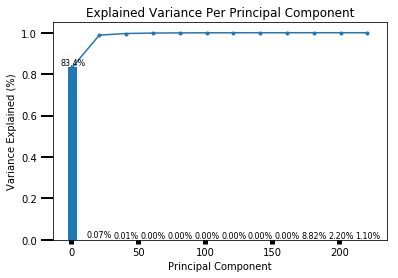

In [108]:
# Investigate the variance accounted for by each principal component.
num_components=len(pca.explained_variance_ratio_)
ind = np.arange(1,num_components,20)
vals = pca.explained_variance_ratio_
 
plt.figure(figsize=(6, 4))
ax = plt.subplot(111)
cumvals = np.cumsum(vals)[ind-1]
ax.bar(ind, vals[ind-1], width = 7)
ax.plot(ind, cumvals,'.-')

for i in ind:
    #print(vals[i-1], ind[i])
    ax.annotate(r"%s%%" % ((str(vals[i-1]*100)[:4])), (i+0.2, vals[i-1]), va="bottom", ha="center", fontsize=8)

ax.xaxis.set_tick_params(width=5)
ax.yaxis.set_tick_params(width=2, length=12)
 
ax.set_xlabel("Principal Component")
ax.set_ylabel("Variance Explained (%)")
plt.title('Explained Variance Per Principal Component')

From a more fine graph, we can see that 21 components describe most of the variences.
Thus we can take a look at first 5 conponents.

### 4.2 Perform PCA and read first 5 components data

In [109]:
ind

array([  1,  21,  41,  61,  81, 101, 121, 141, 161, 181, 201, 221])

In [110]:
pca2 = PCA(n_components = ind[1])
pca2.fit(scaled_data)
pcadata = pca2.transform(scaled_data)

In [111]:


def weight_map(pca, data, n):
    """
    Description: 
        Map weights for the first principal component to corresponding feature names and then print the linked values sorted by weight.
    
    Arguments:
        pca: fitted pca model.
        data: data for fitting pca model.
        n: number of the component for PCA.
    Returns:
        adict: a list of sorted values with names.
    """
    weight = pca.components_[n-1]
    feature = data.columns
    if len(weight) != len(feature):
        print("there is something wrong")
        return
    i = 0
    adict = {}
    while i<len(weight):
        adict[feature[i]] = weight[i]
        i = i+1
    return adict

In [112]:
# the weightmap for the first component
weightmap1 = weight_map(pca2, scaled_data, 1)
# the sorter
sorted_weightmap1 = sorted(weightmap1.items(), key=operator.itemgetter(1))
sorted_weightmap1

[('Employment_Employed part-time', -0.0012049291731049323),
 ('Student_Yes, full-time', -0.0008571158925691559),
 ('Country_United Kingdom', -0.0004555458678025546),
 ('CodeRev_No', -0.000350774908051624),
 ('Employment_Independent contractor, freelancer, or self-employed',
  -0.0003237811172556779),
 ('SocialMedia_Twitter', -0.00028279468448295974),
 ('Country_Germany', -0.000281095342423226),
 ("WorkPlan_There's no schedule or spec; I work on what seems most important or urgent",
  -0.0002786242798089066),
 ('OpenSourcer_Less than once a month but more than once per year',
  -0.00023536673725357656),
 ('Country_Netherlands', -0.00020749957738946064),
 ('EdLevel_Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
  -0.00019943438081864757),
 ('Country_Canada', -0.00019440073319672226),
 ('SocialMedia_Reddit', -0.00014353958559699888),
 ('OpenSourcer_Once a month or more often', -0.00014048453660559217),
 ('Country_Spain', -0.00010988735938715557),
 ('C

In PCA analysis, the most important component is always the first component. Here, we find that the weekly work hour is actually the 

In [113]:
# the weightmap for the second component
weightmap2 = weight_map(pca2, scaled_data, 2)
# the sorter
sorted_weightmap2 = sorted(weightmap2.items(), key=operator.itemgetter(1))
sorted_weightmap2

[('CodeRevHrs', -0.016388613423382877),
 ('Country_India', -0.006825943264744444),
 ('SocialMedia_WhatsApp', -0.005852955720799157),
 ('WorkWeekHrs', -0.005112717355856369),
 ('Student_Yes, full-time', -0.005015709369416472),
 ('CodeRev_No', -0.0037253442296670456),
 ('WorkPlan_There is a schedule and/or spec (made by me or by a colleague), and I follow it very closely',
  -0.003077973181311022),
 ('Employment_Employed part-time', -0.002849647065616669),
 ('Student_Yes, part-time', -0.002622670084526565),
 ('SocialMedia_YouTube', -0.0025918169835549582),
 ('Country_Brazil', -0.002220512821509974),
 ('Country_Poland', -0.0019622135251552543),
 ('EdLevel_Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
  -0.0019044529326950955),
 ('SocialMedia_Facebook', -0.001856464777152873),
 ('Country_Russian Federation', -0.001736546308854784),
 ('OpenSourcer_Never', -0.001691215536661779),
 ('Employment_Independent contractor, freelancer, or self-employed',
  -0.

In [114]:
# the weightmap for the third component
weightmap3 = weight_map(pca2, scaled_data, 3)
# the sorter
sorted_weightmap3 = sorted(weightmap3.items(), key=operator.itemgetter(1))
sorted_weightmap3

[('YearsCode', -0.013176529045427933),
 ('OpenSourcer_Never', -0.012816841730145145),
 ('WorkPlan_There is a schedule and/or spec (made by me or by a colleague), and my work somewhat aligns',
  -0.012107378059836964),
 ('Country_United States', -0.011551890401007885),
 ('SocialMedia_Reddit', -0.009769367101646493),
 ('Student_No', -0.009763046939601974),
 ('Age', -0.0094959213729865),
 ('YearsCodePro', -0.005617561743904125),
 ('Country_United Kingdom', -0.004982228204979749),
 ('Hobbyist_No', -0.0046667044251079886),
 ('OpenSourcer_Less than once per year', -0.003955640516069886),
 ('WorkWeekHrs', -0.00394493911128614),
 ('Country_Germany', -0.0035762901922981416),
 ('Employment_Employed full-time', -0.002984615486914734),
 ('UndergradMajor_A natural science (ex. biology, chemistry, physics)',
  -0.002637838904769803),
 ('CodeRev_Yes, because I was told to do so', -0.002260585065924881),
 ('EdLevel_Master’s degree (MA, MS, M.Eng., MBA, etc.)',
  -0.002064088186286222),
 ('Employment_E

In [115]:
# the weightmap for the forth component
weightmap4 = weight_map(pca2, scaled_data, 4)
# the sorter
sorted_weightmap4 = sorted(weightmap4.items(), key=operator.itemgetter(1))
sorted_weightmap4

[('ConvertedComp', -0.0482937743838096),
 ('EdLevel_Bachelor’s degree (BA, BS, B.Eng., etc.)', -0.04782475451072719),
 ('Student_Yes, full-time', -0.03702355396189754),
 ('OpenSourcer_Never', -0.03519881880483053),
 ('SocialMedia_Reddit', -0.031697034879330475),
 ('Country_India', -0.026877601694619196),
 ('WorkPlan_There is a schedule and/or spec (made by me or by a colleague), and I follow it very closely',
  -0.020268824162638067),
 ('Student_Yes, part-time', -0.018139718623557354),
 ('CodeRev_No', -0.016870410530982396),
 ('SocialMedia_YouTube', -0.016762563580902293),
 ('SocialMedia_Instagram', -0.014661818097795591),
 ('Gender_Woman', -0.014558139706865945),
 ('Employment_Employed part-time', -0.013716100578665165),
 ('Employment_Employed full-time', -0.01367034590237694),
 ('CodeRev_Yes, because I was told to do so', -0.0102857205141501),
 ('EdLevel_Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
  -0.009209702500476421),
 ('UndergradMajor_We

In [116]:
# the weightmap for the fifth component
weightmap5 = weight_map(pca2, scaled_data, 5)
# the sorter
sorted_weightmap5 = sorted(weightmap5.items(), key=operator.itemgetter(1))
sorted_weightmap5

[('CodeRev_Yes, because I see value in code review', -0.44504795817774045),
 ('WorkPlan_There is a schedule and/or spec (made by me or by a colleague), and my work somewhat aligns',
  -0.36844247012198444),
 ('Hobbyist_Yes', -0.2538934174801007),
 ('OpenSourcer_Less than once a month but more than once per year',
  -0.18186913912442965),
 ('UndergradMajor_Computer science, computer engineering, or software engineering',
  -0.16502389006475032),
 ('OpenSourcer_Less than once per year', -0.12282333747881677),
 ('YearsCode', -0.06920740400776842),
 ('OpenSourcer_Once a month or more often', -0.058922406630576366),
 ('Gender_Man', -0.04505574057647288),
 ('EdLevel_Bachelor’s degree (BA, BS, B.Eng., etc.)', -0.040117653704166),
 ('SocialMedia_Reddit', -0.037249325533797464),
 ('SocialMedia_Twitter', -0.03690625000472458),
 ('YearsCodePro', -0.033344862561049786),
 ('Employment_Employed full-time', -0.02851740187015099),
 ('Student_No', -0.019063305258623982),
 ('Country_Germany', -0.0112165

Above analysis is actually give us more information than needed. Thus it might be useful to look at terms that have the largest and lease weight. We can fix it by number of terms to show up, or we can define a barrier to understand it. Here I would like to define an weight threshold of 0.2. Thus any term with absolute weight greater than 0.2 will be print out. 

In [117]:
def obtain_weight_terms(fitted_pca_model, data, component_rank, threshold):
    # Function: print terms and corresponding weight, if the abs value of weight is over the threshold
    """
    Description:
        A function for print terms and corresponding weight, if the abs value of the weight is above the threshold.
        
    Arguments:
        fitted_pca_model: fitted pca model.
        Compnent_rank: number of the component.
        threshold: a threshold for fieltering out all value below.
        
    Returns:
        sig_weightmap: a named list with weight values larger than the threshold.
    """
    weightmap = weight_map(fitted_pca_model, data, component_rank)
    sorted_weightmap = sorted(weightmap.items(), key=operator.itemgetter(1))
    sig_weightmap = []
    i = 0
    while i<len(sorted_weightmap):
        if abs(sorted_weightmap[i][1]>=threshold):
            sig_weightmap.append(sorted_weightmap[i])
        i = i+1
    return sig_weightmap

In [118]:
pca_comp_threshold = 0.2
obtain_weight_terms(pca2, scaled_data, 1, pca_comp_threshold)

[('WorkWeekHrs', 0.9999738432270563)]

In [119]:
obtain_weight_terms(pca2, scaled_data, 2, pca_comp_threshold)

[('ConvertedComp', 0.9980609296012228)]

In [120]:
obtain_weight_terms(pca2, scaled_data, 3, pca_comp_threshold)

[('CodeRevHrs', 0.9989722195091296)]

In [121]:
obtain_weight_terms(pca2, scaled_data, 4, pca_comp_threshold)

[('YearsCode', 0.5239696134396926),
 ('Age', 0.5729186536916401),
 ('YearsCodePro', 0.612810895441465)]

In [122]:
obtain_weight_terms(pca2, scaled_data, 5, pca_comp_threshold)

[('Hobbyist_No', 0.2538934174801007),
 ("WorkPlan_There's no schedule or spec; I work on what seems most important or urgent",
  0.34791572754582306),
 ('OpenSourcer_Never', 0.36361488323382263),
 ('CodeRev_No', 0.39467764787894904)]

Above show top factors that contribute to the first five components.The PCA only tell which factors would account for the differences, but with no bias if it is positive or negative. Thus that is depend on us to decide. Here we see from the data, the feature that separate people most is their work hours per week. Then it is their salary. Next is the code review hours. The forth component are mostly about the experience of the person. and then the fifth component containes mostly coding habits and life style. 

The first component give us different degree of deligentness. 
The second component give us the salary is also different a lot among people.

We have a glimpse on how survey taker are differentiated, now it's time to go a step further to see which factors are correlated. 

## 5. K-mean clustering

Based on the PCA results, we can cluster the data into several clusters. 

### 5.1 Deciding number of clusters for k-mean clustering 

In [123]:
def kmean_n(data, n_list):
    """
    Description:
        Over a number of different cluster counts, run k-means clustering on the data and compute the average within-cluster distances.
    
    Arguments:
        data: pandas dataframe for k-mean model.
        n_list: a numeric list contains number of clusters for k-mean calculations.
        
    Returns:
        score_list: a numeric list for k-mean scores.
    """
    i = 0
    score_list = []
    while i< len(n_list):
        data_kmean = KMeans(n_clusters = n_list[i])
        data_model = data_kmean.fit(data)
        data_score = np.abs(data_model.score(data))
        score_list.append(data_score)
        print(data_score)
        i = i+1
    return score_list

In [124]:
# Investigate the change in within-cluster distance across number of clusters.
# HINT: Use matplotlib's plot function to visualize this relationship.
kn = np.arange(1,25,3)
data_score = kmean_n(pcadata, kn)

8952014.45780079
1733475.120331061
980976.4470723337
730195.1385615689
585375.8060313724
505575.5154545555
463130.27720444393
430297.6894727184


[ 1  4  7 10 13 16 19 22]


Text(0.5, 1.0, 'SSE vs. K')

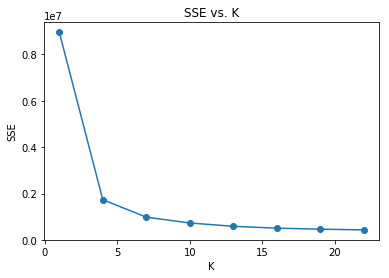

In [125]:
print(kn)
plt.plot(kn, data_score,"o-")
plt.xlabel("K")
plt.ylabel('SSE')
plt.title('SSE vs. K')

Looking at the graph, the elbow point at 5 is best number of clusters for k-mean clustering.

### 4.2 Perform k-mean clustering

In [167]:
# Re-fit the k-means model with the selected number of clusters and obtain
# cluster predictions for the general population demographics data.

kmean_opt = KMeans(n_clusters = 5, random_state=7)
kmean_model = kmean_opt.fit(pcadata)
kmean_data = kmean_model.predict(pcadata)

In [168]:
kmean_data

array([4, 4, 4, ..., 4, 4, 4])

### 4.3 K-mean clustering distribution for 5 different clusters.

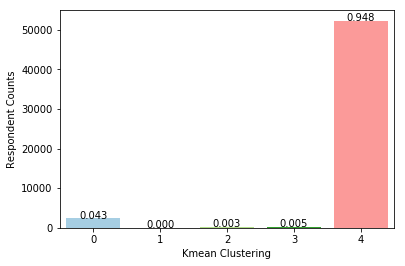

In [169]:
figure, ax = plt.subplots(nrows=1, ncols=1, figsize = (6,4))
sns.countplot(kmean_data, palette = sns.color_palette("Paired"), saturation =1, linewidth=0)
ax.set_xlabel('Kmean Clustering')
ax.set_ylabel("Respondent Counts")

total = len(kmean_data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.3f}'.format(height/total),
            ha="center")

plt.savefig("K-mean-dist.png")

### 4.4 K-mean cluster centroids

In [170]:
# What kinds of people are part of a cluster?
centroid_0 = scaler.inverse_transform([pca2.inverse_transform(kmean_model.cluster_centers_[0])])
centroid_0_data = pd.Series(data = centroid_0[0], index = fill_data.columns).sort_values()
centroid_0_data

Country_Russian Federation                                                                              -4.189676e-03
Country_Iran                                                                                            -2.684050e-03
Country_Pakistan                                                                                        -2.370013e-03
Country_Brazil                                                                                          -2.220915e-03
Country_Turkey                                                                                          -2.164468e-03
Country_Poland                                                                                          -2.096241e-03
Country_Ukraine                                                                                         -1.956191e-03
SocialMedia_VK ВКонта́кте                                                                               -1.538677e-03
Country_Argentina                                       

In [171]:
# What kinds of people are part of a cluster?
centroid_1 = scaler.inverse_transform([pca2.inverse_transform(kmean_model.cluster_centers_[1])])
centroid_1_data = pd.Series(data = centroid_1[0], index = fill_data.columns).sort_values()
centroid_1_data

Employment_Employed part-time                                                                           -1.084937    
Country_United Kingdom                                                                                  -0.659716    
Country_Germany                                                                                         -0.300351    
Country_Canada                                                                                          -0.274902    
Country_Netherlands                                                                                     -0.252375    
Student_Yes, full-time                                                                                  -0.218699    
Country_Spain                                                                                           -0.155804    
Country_United States                                                                                   -0.143753    
Country_Australia                                       

In [172]:
# What kinds of people are part of a cluster?
centroid_2 = scaler.inverse_transform([pca2.inverse_transform(kmean_model.cluster_centers_[2])])
centroid_2_data = pd.Series(data = centroid_2[0], index = fill_data.columns).sort_values()
centroid_2_data

Employment_Employed part-time                                                                           -0.057342     
Country_Philippines                                                                                     -0.000693     
Gender_Woman;Man                                                                                        -0.000645     
Country_Myanmar                                                                                         -0.000638     
Country_Uganda                                                                                          -0.000628     
Country_Bolivia                                                                                         -0.000486     
Country_Rwanda                                                                                          -0.000395     
Country_Morocco                                                                                         -0.000328     
Country_Nigeria                                 

In [173]:
# What kinds of people are part of a cluster?
centroid_3 = scaler.inverse_transform([pca2.inverse_transform(kmean_model.cluster_centers_[3])])
centroid_3_data = pd.Series(data = centroid_3[0], index = fill_data.columns).sort_values()
centroid_3_data

Country_Djibouti                                                                                        -0.000033    
Country_Lao People's Democratic Republic                                                                -0.000025    
Country_Malawi                                                                                          -0.000008    
Country_Democratic Republic of the Congo                                                                -0.000001    
Country_Brunei Darussalam                                                                                0.000002    
Country_Oman                                                                                             0.000005    
Country_Saint Vincent and the Grenadines                                                                 0.000011    
Country_Burkina Faso                                                                                     0.000017    
Country_Democratic People's Republic of Korea           

In [174]:
# What kinds of people are part of a cluster?
centroid_4 = scaler.inverse_transform([pca2.inverse_transform(kmean_model.cluster_centers_[4])])
centroid_4_data = pd.Series(data = centroid_4[0], index = fill_data.columns).sort_values()
centroid_4_data

Country_Liechtenstein                                                                                    0.000009    
Country_Timor-Leste                                                                                      0.000017    
Country_Democratic Republic of the Congo                                                                 0.000018    
Country_Seychelles                                                                                       0.000018    
Country_Mali                                                                                             0.000019    
Country_Gabon                                                                                            0.000019    
Country_Barbados                                                                                         0.000019    
Country_Togo                                                                                             0.000019    
Country_Oman                                            

In [175]:
salary_centers = [
    centroid_0_data["ConvertedComp"],
    centroid_1_data["ConvertedComp"],
    centroid_2_data["ConvertedComp"],
    centroid_3_data["ConvertedComp"],
    centroid_4_data["ConvertedComp"]]
weekhour_centers = [
    centroid_0_data["WorkWeekHrs"],
    centroid_1_data["WorkWeekHrs"],
    centroid_2_data["WorkWeekHrs"],
    centroid_3_data["WorkWeekHrs"],
    centroid_4_data["WorkWeekHrs"]
]

In [176]:
salary_centers

[1307701.8733419187,
 28198.799888080386,
 131310.7918387948,
 62481.983609915,
 73787.80331472312]

In [177]:
weekhour_centers

[41.89180203080253,
 4362.488751566487,
 384.28552885803276,
 147.71677740615988,
 40.0245171850386]

In [200]:
cluster_df = pd.DataFrame({"AvgSalary": salary_centers, "HourWeek": weekhour_centers}, index = ["Cluster 0", "Cluster 1", "Cluster 2", "Cluster 3", "Cluster 4"])
cluster_df['nick_name'] = ["HighSalary","LowSalary", "MidHigh",  "CommonLong", "Common"]
cluster_df

,AvgSalary,HourWeek,nick_name
Cluster 0,1.307702e+06,41.891802,HighSalary
Cluster 1,2.819880e+04,4362.488752,LowSalary
Cluster 2,1.313108e+05,384.285529,MidHigh
Cluster 3,6.248198e+04,147.716777,CommonLong
Cluster 4,7.378780e+04,40.024517,Common


### 4.5 Avg. Hours word per week vs. annual salary classified with k-mean.

In [179]:
# predict the labels on the same data to show the category that point belongs to
pca_labels = kmean_model.labels_
# this should provide a plot of your data colored by center
#h.plot_data(fill_data, pca_labels)
pca_labels

array([4, 4, 4, ..., 4, 4, 4])

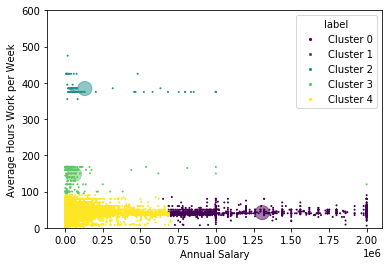

In [180]:
myfig = plt.scatter(fill_data["ConvertedComp"], fill_data['WorkWeekHrs'], c=kmean_data, s=1, cmap='viridis')
plt.scatter(salary_centers, weekhour_centers, c=np.unique(kmean_data), s=200, alpha=0.5);
plt.ylim(0, 600)
plt.ticklabel_format(axis='x', style='sci', scilimits=(-2,2))
plt.xlabel("Annual Salary")
plt.ylabel("Average Hours Work per Week")

lp = lambda i: plt.plot([],color=myfig.cmap(myfig.norm(i)), ms=np.sqrt(10), mec="none",
                        label="Cluster {:g}".format(i), ls="", marker="o")[0]
handles = [lp(i) for i in np.unique(kmean_data)]
plt.legend(handles=handles, loc="upper right", title="label")

plt.savefig("K-mean Clustering.png")

### 4.6 Correlation between working hours and annual salary

In [181]:
np.corrcoef(fill_data["ConvertedComp"], fill_data['WorkWeekHrs'])

array([[1.       , 0.0138017],
       [0.0138017, 1.       ]])

## 5. Lasso linear model HighSalary
- Using clustering data, my prediction gets way better. 
- Using only numberic values will lower prediction accuracy.
- alpha value didn't impact the regression too much.

In [182]:
response_col = ["ConvertedComp"]
test_size = 0.2
rand_state = 123

scaled_lasso = scaled_data
scaled_lasso["kmean"] = kmean_data

In [183]:
lasso_highsalary = scaled_lasso.loc[scaled_lasso['kmean'] == 0]

#Split into explanatory and response variables
X = lasso_highsalary.drop(columns=response_col)
y = lasso_highsalary[response_col]

#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=rand_state)

In [184]:
from sklearn import linear_model
reg_lasso = linear_model.Lasso(alpha=0.01)
reg_lasso.fit(X_train, y_train)  

#Predict using your model
y_test_lasso_preds = reg_lasso.predict(X_test)
y_train_lasso_preds = reg_lasso.predict(X_train)

#Score using your model
test_score = r2_score(y_test, y_test_lasso_preds)
train_score = r2_score(y_train, y_train_lasso_preds)

print("The training score is: ", train_score)
print("The testing score is: ", test_score)

The training score is:  0.5229312208810949
The testing score is:  0.5758502784118398


In [185]:
def lasso_weight_map(lasso, data):
    """
    Description:
        Map weights for the lasso regression to corresponding feature names 
        and then print the linked values, sorted by weight.
        
    Arguments:
        lasso: fitted lasso model.
        data: data frame used for fitting model.
        
    Returns:
        sorted_adict: Map weights for the lasso regression to corresponding feature names.
    """
    weight = lasso.coef_
    feature = data.columns
    if len(weight) != len(feature):
        print("there is something wrong")
        return
    i = 0
    adict = {}
    while i<len(weight):
        adict[feature[i]] = weight[i]
        i = i+1
    sorted_adict = sorted(adict.items(), key=operator.itemgetter(1))
    return sorted_adict

In [186]:
def df_for_lasso(lasso_weight_list):
    """
    Description:
        Create a data frame from the sorted list.
        
    Arguments:
        lasso_weight_list: Map weights for the lasso regression to corresponding feature names.
        
    Returns:
        df: sorted dataframe for lasso weight with names.
    """
    
    name_list = []
    weight_list = []
    i = 0
    while i<len(lasso_weight_list):
        if lasso_weight_list[i][1]!=0:
            name_list.append(lasso_weight_list[i][0])
            weight_list.append(lasso_weight_list[i][1])
        i = i+1
    df = pd.DataFrame(weight_list, index=name_list, columns=["coef"])
    return df
    

In [187]:
reg_lasso.intercept_ 

array([11.83805445])

In [188]:
lasso_weight = lasso_weight_map(reg_lasso, X)
lasso_weight

[('Gender_Woman', -1.0348155202174494),
 ('Student_Yes, part-time', -0.9240236570687014),
 ('UndergradMajor_Fine arts or performing arts (ex. graphic design, music, studio art)',
  -0.8999259700701511),
 ('Country_United Kingdom', -0.8148339024694787),
 ('EdLevel_Other doctoral degree (Ph.D, Ed.D., etc.)', -0.8086850242197049),
 ('UndergradMajor_Information systems, information technology, or system administration',
  -0.6767717842653519),
 ('UndergradMajor_Another engineering discipline (ex. civil, electrical, mechanical)',
  -0.5644801478097183),
 ('Country_France', -0.5596703129930277),
 ('Country_Germany', -0.5355490099644409),
 ('Employment_Employed part-time', -0.5199394143757259),
 ("WorkPlan_There's no schedule or spec; I work on what seems most important or urgent",
  -0.40465013659999377),
 ('OpenSourcer_Less than once a month but more than once per year',
  -0.2860891771378935),
 ('SocialMedia_Instagram', -0.27807270313396315),
 ('Country_Spain', -0.15076094169893003),
 ('Op

In [189]:
highsalary_df = df_for_lasso(lasso_weight)
highsalary_df

,coef
Gender_Woman,-1.034816
"Student_Yes, part-time",-0.924024
"UndergradMajor_Fine arts or performing arts (ex. graphic design, music, studio art)",-0.899926
Country_United Kingdom,-0.814834
"EdLevel_Other doctoral degree (Ph.D, Ed.D., etc.)",-0.808685
"UndergradMajor_Information systems, information technology, or system administration",-0.676772
"UndergradMajor_Another engineering discipline (ex. civil, electrical, mechanical)",-0.564480
Country_France,-0.559670
Country_Germany,-0.535549
Employment_Employed part-time,-0.519939


In [190]:
highsalary_df.size

39

## 6. Creating social medium bar plot for HighSalary group and Common group

It's interesting to understand what are the differences between high salary group and the common salary group. Thus a bar plot for their social media usage is ploted.

In [191]:
plotting_data = mis_row_data
plotting_data["kmean"]= kmean_data

HighSalary_social = plotting_data["SocialMedia"].loc[scaled_lasso['kmean'] == 0].value_counts()
Normal_social = plotting_data["SocialMedia"].loc[scaled_lasso['kmean'] == 4].value_counts()

E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [192]:
HighSalary_social

Reddit                      644
Twitter                     412
Facebook                    298
YouTube                     270
WhatsApp                    213
I don't use social media    177
Instagram                   171
LinkedIn                    93 
Snapchat                    21 
WeChat 微信                   17 
Weibo 新浪微博                  1  
Youku Tudou 优酷              1  
Name: SocialMedia, dtype: int64

In [193]:
Normal_social

Reddit                      9410
Facebook                    8156
WhatsApp                    7727
Twitter                     7718
YouTube                     7009
Instagram                   3739
I don't use social media    3094
LinkedIn                    2617
VK ВКонта́кте               353 
WeChat 微信                   286 
Snapchat                    261 
Weibo 新浪微博                  22  
Youku Tudou 优酷              7   
Hello                       1   
Name: SocialMedia, dtype: int64

In [194]:
HighSalary_name = HighSalary_social.index
Normal_name = Normal_social.index

SocialMedium_name = list(set(HighSalary_name).union( set(Normal_name)) ) # Union of two set
SocialMedium_name

['Instagram',
 'WeChat 微信',
 'LinkedIn',
 'Reddit',
 'WhatsApp',
 'Weibo 新浪微博',
 'Twitter',
 'Hello',
 'YouTube',
 'Snapchat',
 "I don't use social media",
 'VK ВКонта́кте',
 'Facebook',
 'Youku Tudou 优酷']

In [195]:
# Create list for social medium counts
i = 0
HighSalary_values = []
Normal_values = []
while i<len(SocialMedium_name):

    try:
        HS_count = HighSalary_social[SocialMedium_name[i]]
    except:
        HS_count = 0
        
    try:
        N_count = Normal_social[SocialMedium_name[i]]
    except:
        N_count = 0
        
    HighSalary_values.append(HS_count)
    Normal_values.append(N_count)
    
    i = i+1

In [196]:
HighSalary_values

[171, 17, 93, 644, 213, 1, 412, 0, 270, 21, 177, 0, 298, 1]

In [197]:
Normal_values

[3739, 286, 2617, 9410, 7727, 22, 7718, 1, 7009, 261, 3094, 353, 8156, 7]

In [198]:
# create social medium dataframe
social_df = pd.DataFrame({'High Salary': HighSalary_values, 'Common Salary': Normal_values}, index=SocialMedium_name)

<Figure size 360x864 with 0 Axes>

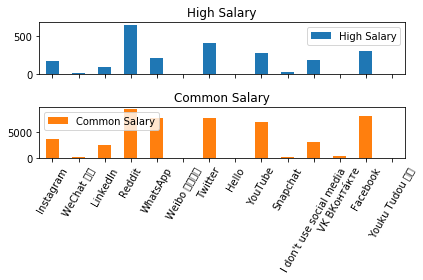

In [199]:
plt.figure(figsize=(5, 12))
axes = social_df.plot.bar(rot=60, subplots=True)
axes[1].legend(loc=2)  # doctest: +SKIP
plt.tight_layout()
plt.savefig("Social Medium Compare.png")

## 7. Analysis Discussion

In this analysis, using data from 17 columns within the survey, I did following analysis:
- PCA: Obtain data distances and reduce feature numbers.
- K-mean Clustering: PCA distances were used for clustering.
- Histogram for social media: for highsalary and common salary cluster, observe and perform pairwise comparison for data in those 17 columns.

With distances provided by PCA, k-mean cluster was performed with number of clusters as 5, then a lasso model was created to explain the factors contributing to high annual salary. The most advantagous factor is to reside in United States, while the most disadvantagous factor is being women. We could also see that working professionally, review codes, and good work plan also positively contribute to high salary. Then the comparison of social media usage comparison shows a higher usage of Instagram, and WhatsApp comparing to the high salary group. 

This model is useful for us to form better working habbits and become more efficient in programming. 